In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import matplotlib.ticker as tk
import squarify

In [2]:
#Create url search with Keywrod "COVID-19" containing the relevant fields we need for analysis and make single call to get data example
questURL = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest = requests.get(questURL).json()
Quest

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:30 00:15:40.081',
  'Expression': 'covid 19',
  'NStudiesAvail': 347327,
  'NStudiesFound': 2949,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationCity',
   'LocationCountry',
   'EnrollmentCount',
   'StdAge',
   'Gender'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04395482'],
    'BriefTitle': ['Lung CT Scan Analysis of SARS-CoV2 Induced Lung Injury'],
    'StatusVerifiedDate': ['May 2020'],
    'CompletionDate': ['October 15, 2020'],
    'OrgFullName': ['University of Milano Bicocca'],
    'OrgClass': ['OTHER'],
    'Keyword': ['Lung injury', 'sars-covid-2', 'coronavirus infection'],
    'LocationCity': ['Bergamo',
     'Bergamo',
     'Ferrara',
     'Lecco',
     'Melzo',
     'Monza',
     'Rimini',
     'San Marino'],
    'LocationCountry': ['Italy',
   

In [3]:
# Take the amount of possible results and use as our limit, so we know how many times to call the API
limit1 = Quest['StudyFieldsResponse']['NStudiesFound'] 
limit1

2949

In [4]:
# Make our series of 3 requests and store them in three variables

tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   
tempL1 = requests.get(tempURL1).json()

tempURL2 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk=2000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

tempURL3 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=2001\
           &max_rnk={limit1}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL3 = requests.get(tempURL3).json()

Q1_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q1_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']
Q1_tempL3 = tempL3['StudyFieldsResponse']['StudyFields']

In [5]:
# Turn those variables into a Dataframe
Q1_tempDF1 = pd.DataFrame(Q1_tempL1)
Q1_tempDF2 = pd.DataFrame(Q1_tempL2)
Q1_tempDF3 = pd.DataFrame(Q1_tempL3)

In [6]:
# create function that cleans up the results and transforms column values into the necessary data types
def change_remove45(df):
    df = df.astype(str)
    df["NCTId"] = df["NCTId"].str.lstrip("['")
    df["NCTId"] = df["NCTId"].str.rstrip("']")
    df["BriefTitle"] = df["BriefTitle"].str.lstrip("['")
    df["BriefTitle"] = df["BriefTitle"].str.rstrip("']")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.lstrip("['")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.rstrip("']")
    df["CompletionDate"] = df["CompletionDate"].str.lstrip("['")
    df["CompletionDate"] = df["CompletionDate"].str.rstrip("']")
    df["OrgFullName"] = df["OrgFullName"].str.lstrip("['")
    df["OrgFullName"] = df["OrgFullName"].str.rstrip("']")
    df["OrgClass"] = df["OrgClass"].str.lstrip("['")
    df["OrgClass"] = df["OrgClass"].str.rstrip("']")
    df["Keyword"] = df["Keyword"].str.lstrip("['")
    df["Keyword"] = df["Keyword"].str.rstrip("']")
    df["LocationCity"] = df["LocationCity"].str.lstrip("['")
    df["LocationCity"] = df["LocationCity"].str.rstrip("']")
    df["LocationCountry"] = df["LocationCountry"].str.lstrip("['")
    df["LocationCountry"] = df["LocationCountry"].str.rstrip("']")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.lstrip("['")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.rstrip("']")
    df["StdAge"] = df["StdAge"].str.lstrip("['")
    df["StdAge"] = df["StdAge"].str.rstrip("']")
    df["Gender"] = df["Gender"].str.lstrip("['")
    df["Gender"] = df["Gender"].str.rstrip("']")
    df["LocationFacility"] = df["LocationFacility"].str.lstrip("['")
    df["LocationFacility"] = df["LocationFacility"].str.rstrip("']")
    df["StartDate"] = df["StartDate"].str.lstrip("['")
    df["StartDate"] = df["StartDate"].str.rstrip("']")
    df["LocationStatus"] = df["LocationStatus"].str.lstrip("['")
    df["LocationStatus"] = df["LocationStatus"].str.rstrip("']")
    df["NCTId"] = df["NCTId"].str.replace("'","")
    df["BriefTitle"] = df["BriefTitle"].str.replace("'","")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.replace("'","")
    df["CompletionDate"] = df["CompletionDate"].str.replace("'","")
    df["OrgFullName"] = df["OrgFullName"].str.replace("'","")
    df["OrgClass"] = df["OrgClass"].str.replace("'","")
    df["Keyword"] = df["Keyword"].str.replace("'","")
    df["LocationCity"] = df["LocationCity"].str.replace("'","")
    df["LocationCountry"] = df["LocationCountry"].str.replace("'","")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.replace("'","")
    df["StdAge"] = df["StdAge"].str.replace("'","")
    df["Gender"] = df["Gender"].str.replace("'","")
    df["StartDate"] = df["StartDate"].str.replace("'","")
    df["LocationFacility"] = df["LocationFacility"].str.replace("'","")
    df["LocationFacility"] = df["LocationStatus"].str.replace("'","")
    df["EnrollmentCount"] = pd.to_numeric(df["EnrollmentCount"])
    return df 

In [7]:
# run the first dataframe against the function
clean_Q1_tempDF3 = change_remove45(Q1_tempDF3)
clean_Q1_tempDF3

Rank        NCTId                                         BriefTitle  \
0    2001  NCT04387409  "Study to Assess VPM1002 in Reducing Healthcar...   
1    2002  NCT04380818  Low Dose Anti-inflammatory Radiotherapy for th...   
2    2003  NCT04343001  Coronavirus Response - Active Support for Hosp...   
3    2004  NCT04403243  COLchicine Versus Ruxolitinib and Secukinumab ...   
4    2005  NCT04429555  Efficacy, Safety, Tolerability, and Biomarkers...   
..    ...          ...                                                ...   
944  2945  NCT03728257  Lung Transplant G0 (LTGO): Improving Self-Mana...   
945  2946  NCT03823469  Evaluating the Impact of a Culinary Coaching T...   
946  2947  NCT04429061  Reaching 90 90 90 in Adolescents in Zambia: Us...   
947  2948  NCT03922334                        Navigating New Motherhood 2   
948  2949  NCT04180709  CBT to Reduce Insomnia and Improve Social Reco...   

    StatusVerifiedDate         StartDate     CompletionDate  \
0            June 2020      May 25, 2020      June 30, 2021   
1             May 2020      June 5, 2020       July 1, 2021   
2           April 2020         July 2020        August 2021   
3             May 2020       May 8, 2020    August 23, 2020   
4            June 2020     July 31, 2020   December 1, 2021   
..                 ...               ...                ...   
944          June 2020    March 25, 2019      April 8, 2022   
945           May 2020      May 20, 2019      February 2022   
946          June 2020     March 1, 2020      June 30, 2023   
947          June 2020  January 21, 2020      December 2024   
948          June 2020   August 31, 2020  November 30, 2022   

                                           OrgFullName  OrgClass  \
0                      Vakzine Projekt Management GmbH  INDUSTRY   
1    Grupo de Investigación Clínica en Oncología Ra...     OTHER   
2       London School of Hygiene and Tropical Medicine     OTHER   
3    Lomonosov Moscow State University Medical Rese...     OTHER   
4                                           MediciNova  INDUSTRY   
..                                                 ...       ...   
944                           University of Pittsburgh     OTHER   
945                  Spaulding Rehabilitation Hospital     OTHER   
946                University of Alabama at Birmingham     OTHER   
947                            Northwestern University     OTHER   
948                            University of Cambridge     OTHER   

                                               Keyword  \
0            infectious respiratory diseases, COVID-19   
1       COVID 19, RADIATION, Anti-inflammatory effects   
2    Adult Respiratory Distress Syndrome, Pneumonia...   
3       COVID 19, colchicine, ruxolitinib, secukinumab   
4    COVID-19, Acute respiratory distress syndrome,...   
..                                                 ...   
944                                                      
945  Home cooking, Telemedicine, Nutrition, Health ...   
946                      Adolescents, Zambia, Football   
947                                                      
948  Cognition, Social Recovery, Immunopsychiatry, ...   

                                      LocationFacility  \
0                               Recruiting, Recruiting   
1    Not yet recruiting, Not yet recruiting, Recrui...   
2                                                        
3                                           Recruiting   
4                                                        
..                                                 ...   
944                                         Recruiting   
945                              Completed, Recruiting   
946                                         Recruiting   
947                                         Recruiting   
948                                                      

                                        LocationStatus  \
0                             Recruiting', 'Recruiting

In [8]:
# run the second dataframe against the function
clean_Q1_tempDF2 = change_remove45(Q1_tempDF2)
clean_Q1_tempDF2

Rank        NCTId                                         BriefTitle  \
0    1001  NCT04435314  Efficacy and Safety of Nitazoxanide for Post E...   
1    1002  NCT04347928  Respiratory and Hemodynamic Changes Induced in...   
2    1003  NCT04416308  COVID 19 : Seroprevalence Study of Anti SRAS-C...   
3    1004  NCT04490772  Characteristics and Outcomes of Gastrointestin...   
4    1005  NCT04486313  Trial to Evaluate Efficacy and Safety of Nitaz...   
..    ...          ...                                                ...   
995  1996  NCT04395105  Dexamethasone for COVID-19 Related ARDS: a Mul...   
996  1997  NCT04336657  Corona-Like Illness: Did we Got it Before WHO ...   
997  1998  NCT04468802  Do Childhood Measles and DTaP Vaccination Decr...   
998  1999  NCT04332913  Efficacy and Safety of Tocilizumab in the Trea...   
999  2000  NCT04462367       Northeast COVID-19 and Pregnancy Study Group   

    StatusVerifiedDate         StartDate     CompletionDate  \
0            June 2020         June 2020        August 2020   
1             May 2020    April 20, 2020     September 2020   
2            June 2020      May 29, 2020   October 10, 2020   
3            July 2020         July 2020     September 2020   
4            July 2020     July 30, 2020   October 30, 2020   
..                 ...               ...                ...   
995          July 2020      May 21, 2020   January 31, 2021   
996         April 2020        April 2020           May 2020   
997          July 2020  February 1, 2020       July 1, 2020   
998         April 2020     April 1, 2020     March 31, 2021   
999          July 2020      July 1, 2020  December 20, 2022   

                                           OrgFullName  OrgClass  \
0                                        Azidus Brasil  INDUSTRY   
1                           University Hospital, Lille     OTHER   
2                           Rennes University Hospital     OTHER   
3                                    Assiut University     OTHER   
4                             Romark Laboratories L.C.  INDUSTRY   
..                                                 ...       ...   
995  Centro de Educación Medica e Investigaciones C...     OTHER   
996                                  Assiut University     OTHER   
997  Kanuni Sultan Suleyman Training and Research H...     OTHER   
998                            "University of LAquila"     OTHER   
999  Instituto Materno Infantil Prof. Fernando Figu...     OTHER   

                                               Keyword  \
0                                                        
1                                                        
2                                 Covid 19, SRAS-CoV-2   
3            Covid-19, characteristics, Outcome, Egypt   
4                                                        
..                                                 ...   
995                                                      
996  COVID-19, Corona-like illness, WHO announcemen...   
997                                                      
998                                        Tocilizumab   
999  coronavirus, COVID-19, coronavirus infection, ...   

                                      LocationFacility  \
0                                                        
1                                           Recruiting   
2    Recruiting, Recruiting, Recruiting, Recruiting...   
3                                                        
4                                                        
..                                                 ...   
995                 Recruiting, Recruiting, Recruiting   
996                                         Recruiting   
997                                                      
998                                         Recruiting   
999                                                      

                                        LocationStatus  \
0                                                     

In [9]:
# run the 3rd dataframe against the function
clean_Q1_tempDF1 = change_remove45(Q1_tempDF1)
clean_Q1_tempDF1

Rank        NCTId                                         BriefTitle  \
0       1  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
1       2  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   
2       3  NCT04476940  COVID-19 Breastfeeding Guideline for African-A...   
3       4  NCT04412265          Frailty in Elderly Patients With COVID-19   
4       5  NCT04427332     Smell and Taste Disorders in COVID-19 Patients   
..    ...          ...                                                ...   
995   996  NCT04341480  The Safety of Chemotherapy for Patients With G...   
996   997  NCT04445389  Safety and Immunogenicity Study of GX-19, a CO...   
997   998  NCT04383886  Evaluation of Emergency Department (ED) Staff ...   
998   999  NCT04393311  Ulinastatin for the Treatment of COVID-19 in H...   
999  1000  NCT04351919  Assessment of Efficacy and Safety of HCQ and A...   

    StatusVerifiedDate       StartDate      CompletionDate  \
0             May 2020  April 15, 2020    October 15, 2020   
1            June 2020     May 5, 2020            May 2021   
2            July 2020  September 2020           June 2022   
3            June 2020   March 1, 2020       March 1, 2021   
4            June 2020    May 15, 2020  September 30, 2020   
..                 ...             ...                 ...   
995         April 2020  April 10, 2020       July 10, 2020   
996          July 2020   June 17, 2020       June 17, 2022   
997         April 2020  April 18, 2020     August 18, 2020   
998           May 2020       July 2020        January 2021   
999           May 2020     May 5, 2020       July 15, 2020   

                                OrgFullName  OrgClass  \
0              University of Milano Bicocca     OTHER   
1    "Centre Hospitalier Régional dOrléans"     OTHER   
2                   Meharry Medical College     OTHER   
3              University of Milano Bicocca     OTHER   
4              University of Milano Bicocca     OTHER   
..                                      ...       ...   
995                         Tongji Hospital     OTHER   
996                          Genexine, Inc.  INDUSTRY   
997                 Hospices Civils de Lyon     OTHER   
998                     Stanford University     OTHER   
999              Abderrahmane Mami Hospital     OTHER   

                                               Keyword  \
0     Lung injury, sars-covid-2, coronavirus infection   
1    Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...   
2    COVID-19, Exclusive Breastfeeding, Breastfeedi...   
3    Coronavirus, sars-covid-2, coronavirus infecti...   
4     Coronavirus, sars-covid-2, coronavirus infection   
..                                                 ...   
995  COVID-19, SARS-CoV-2, Gynecological cancer, Ch...   
996                                                      
997  COVID-19 pandemic, level of stress, emergency ...   
998                                                      
999                                                      

                                      LocationFacility  \
0    Recruiting, Recruiting, Recruiting, Recruiting...   
1                                           Recruiting   
2                                                        
3                                           Recruiting   
4                                           Recruiting   
..                                                 ...   
995                                                      
996                                         Recruiting   
997  Recruiting, Recruiting, Recruiting, Recruiting...   
998                                                      
999                                                      

                                        LocationStatus  \
0    Recruiting', 'Recruiting', 'Recruiting', 'Recr...   
1                                           Recruiting   
2                                                        
3                       

In [10]:
#Create url search with Keywrod "COVID-19" containing the relevant fields we need for analysis and make single call to get data example
query = 'coronavirus'
quest2URL = f'http://ClinicalTrials.gov/api/query/study_fields?expr={query}\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest2 = requests.get(quest2URL).json()
Quest2

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:30 00:15:40.081',
  'Expression': 'coronavirus',
  'NStudiesAvail': 347327,
  'NStudiesFound': 1491,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'StartDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationFacility',
   'LocationStatus',
   'LocationCity',
   'LocationCountry',
   'EnrollmentCount',
   'StdAge',
   'Gender'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04279795'],
    'BriefTitle': ['Detection of 2019 Novel Coronavirus in Multiple Organ System and Its Relationship With Clinical Manifestations'],
    'StatusVerifiedDate': ['February 2020'],
    'StartDate': ['January 20, 2020'],
    'CompletionDate': ['February 28, 2021'],
    'OrgFullName': ['Third Affiliated Hospital, Sun Yat-Sen University'],
    'OrgClass': ['OTHER'],
    'Keyword': ['2019 Novel Coronavirus'],
    'LocationFacility'

In [11]:
# Take the amount of possible results and use as our limit, so we know how many times to call the API
limit2 = Quest2['StudyFieldsResponse']['NStudiesFound'] 
limit2

1491

In [12]:
# Make our series of 2 requests and store them in three variables
tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   

tempL1 = requests.get(tempURL1).json()

tempURL2 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk={limit2}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

Q2_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q2_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']

In [13]:
# Turn the variables into DataFrames
Q2_tempDF1 = pd.DataFrame(Q2_tempL1)
Q2_tempDF2 = pd.DataFrame(Q2_tempL2)

In [14]:
# run the 4th dataframe against the function
clean_Q2_tempDF1 = change_remove45(Q2_tempDF1)
clean_Q2_tempDF1

Rank        NCTId                                         BriefTitle  \
0       1  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
1       2  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   
2       3  NCT04476940  COVID-19 Breastfeeding Guideline for African-A...   
3       4  NCT04412265          Frailty in Elderly Patients With COVID-19   
4       5  NCT04427332     Smell and Taste Disorders in COVID-19 Patients   
..    ...          ...                                                ...   
995   996  NCT04460534  Detection of COVID-19 (SARS-CoV-2) in the Seme...   
996   997  NCT04397237  Prevalence and Seroconversion of COVID-19 in A...   
997   998  NCT04464486  Remote COVID-19 Symptom Tracking for Cancer Pa...   
998   999  NCT04472013  Systematic Assessment of SARS-CoV-2 Neurotropi...   
999  1000  NCT04489446                             Sildenafil in COVID-19   

    StatusVerifiedDate       StartDate      CompletionDate  \
0             May 2020  April 15, 2020    October 15, 2020   
1            June 2020     May 5, 2020            May 2021   
2            July 2020  September 2020           June 2022   
3            June 2020   March 1, 2020       March 1, 2021   
4            June 2020    May 15, 2020  September 30, 2020   
..                 ...             ...                 ...   
995          July 2020     May 7, 2020     August 31, 2021   
996           May 2020        May 2020       December 2020   
997          July 2020  April 21, 2020        May 31, 2021   
998          July 2020  September 2020       December 2022   
999          July 2020     August 2020          March 2021   

                                           OrgFullName OrgClass  \
0                         University of Milano Bicocca    OTHER   
1               "Centre Hospitalier Régional dOrléans"    OTHER   
2                              Meharry Medical College    OTHER   
3                         University of Milano Bicocca    OTHER   
4                         University of Milano Bicocca    OTHER   
..                                                 ...      ...   
995  GCS Ramsay Santé pour l’Enseignement et la Rec...    OTHER   
996                         Pitié-Salpêtrière Hospital    OTHER   
997                                 University of Utah    OTHER   
998            University Hospital, Basel, Switzerland    OTHER   
999                  Universidad Nacional Andres Bello    OTHER   

                                               Keyword  \
0     Lung injury, sars-covid-2, coronavirus infection   
1    Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...   
2    COVID-19, Exclusive Breastfeeding, Breastfeedi...   
3    Coronavirus, sars-covid-2, coronavirus infecti...   
4     Coronavirus, sars-covid-2, coronavirus infection   
..                                                 ...   
995                                                      
996  COVID-19, Systemic Lupus Erythematosus, "Sjogr...   
997                                                      
998  SARS-CoV-2, neurotropism of SARS-CoV-2, microg...   
999  COVID19, SARS-COV2 Infection, Sildenafil, Phos...   

                                      LocationFacility  \
0    Recruiting, Recruiting, Recruiting, Recruiting...   
1                                           Recruiting   
2                                                        
3                                           Recruiting   
4                                           Recruiting   
..                                                 ...   
995                                         Recruiting   
996                                                      
997                                                      
998                             Recruiting, Recruiting   
999                                                      

                                        LocationStatus  \
0    Recruiting', 'Recruiting', 'Recruiting', 'Recr...   
1                   

In [15]:
# run the 5th dataframe against the function
clean_Q2_tempDF2 = change_remove45(Q2_tempDF2)
clean_Q2_tempDF2

Rank        NCTId                                         BriefTitle  \
0    1001  NCT04335188   COVID-19 Registry Rhineland-Palatinate (Germany)   
1    1002  NCT04371822  Efficacy of Sunlight Activated Synthetic Porph...   
2    1003  NCT04358939  Prone Position in Patients on High-flow Nasal ...   
3    1004  NCT04456556  Combined Endophthalmitis and Orbital Celluliti...   
4    1005  NCT04353674        Modulation of Hyperinflammation in COVID-19   
..    ...          ...                                                ...   
486  1487  NCT04326075  Early CPAP in COVID Patients With Respiratory ...   
487  1488  NCT04461925  Treatment of Coronavirus COVID-19 Pneumonia (P...   
488  1489  NCT04359654   Nebulised Dornase Alfa for Treatment of COVID-19   
489  1490  NCT04374019  Novel Agents for Treatment of High-risk COVID-...   
490  1491  NCT04460105  Lanadelumab in Participants Hospitalized With ...   

    StatusVerifiedDate       StartDate      CompletionDate  \
0           March 2020   April 6, 2020  September 30, 2021   
1            June 2020     August 2020       November 2020   
2           April 2020  April 27, 2020   November 24, 2020   
3            June 2020  April 27, 2020       June 30, 2020   
4            June 2020  April 28, 2020     January 1, 2021   
..                 ...             ...                 ...   
486         March 2020   April 6, 2020    November 9, 2020   
487          June 2020     May 2, 2020       December 2021   
488         April 2020     May 1, 2020    November 1, 2020   
489          July 2020     May 1, 2020            May 2021   
490          July 2020  August 4, 2020  September 30, 2020   

                                           OrgFullName  OrgClass  \
0         IHF GmbH - Institut für Herzinfarktforschung     OTHER   
1                              Kafrelsheikh University     OTHER   
2                           University Hospital, Tours     OTHER   
3                                     Minia University     OTHER   
4                     Lawson Health Research Institute     OTHER   
..                                                 ...       ...   
486  Mario Negri Institute for Pharmacological Rese...     OTHER   
487                          Institute of Cell Therapy  INDUSTRY   
488                         University College, London     OTHER   
489                             University of Kentucky     OTHER   
490                                             Takeda  INDUSTRY   

                                               Keyword  \
0                                                        
1                                                        
2    Acute Respiratory Distress Syndrome, COVID-19,...   
3        endophthalmitis, orbital cellulitis, covid-19   
4                                cytokine storm, SLEDD   
..                                                 ...   
486                                                      
487              Placenta-derived MMSCs, i/v infusions   
488  COVID, COVID19, Pneumonia, Coronavirus, Hypoxi...   
489                                          high-risk   
490                                                      

                                      LocationFacility  \
0                                           Recruiting   
1                                                        
2    Not yet recruiting, Not yet recruiting, Not ye...   
3                                                        
4                               Recruiting, Recruiting   
..                                                 ...   
486                                                      
487                                         Recruiting   
488                                                      
489                                         Recruiting   
490                                                      

                                        LocationStatus  \
0                                           Recruiting   
1       

In [16]:
# combine all 5 dataframes into a single, large dataframe
DF_QQ = pd.concat([clean_Q1_tempDF1, clean_Q1_tempDF2, clean_Q1_tempDF3, clean_Q2_tempDF1, clean_Q2_tempDF2], ignore_index=True)
DF_QQ = DF_QQ.drop_duplicates()
DF_QQ

Rank        NCTId                                         BriefTitle  \
0        1  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
1        2  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   
2        3  NCT04476940  COVID-19 Breastfeeding Guideline for African-A...   
3        4  NCT04412265          Frailty in Elderly Patients With COVID-19   
4        5  NCT04427332     Smell and Taste Disorders in COVID-19 Patients   
...    ...          ...                                                ...   
4435  1487  NCT04326075  Early CPAP in COVID Patients With Respiratory ...   
4436  1488  NCT04461925  Treatment of Coronavirus COVID-19 Pneumonia (P...   
4437  1489  NCT04359654   Nebulised Dornase Alfa for Treatment of COVID-19   
4438  1490  NCT04374019  Novel Agents for Treatment of High-risk COVID-...   
4439  1491  NCT04460105  Lanadelumab in Participants Hospitalized With ...   

     StatusVerifiedDate       StartDate      CompletionDate  \
0              May 2020  April 15, 2020    October 15, 2020   
1             June 2020     May 5, 2020            May 2021   
2             July 2020  September 2020           June 2022   
3             June 2020   March 1, 2020       March 1, 2021   
4             June 2020    May 15, 2020  September 30, 2020   
...                 ...             ...                 ...   
4435         March 2020   April 6, 2020    November 9, 2020   
4436          June 2020     May 2, 2020       December 2021   
4437         April 2020     May 1, 2020    November 1, 2020   
4438          July 2020     May 1, 2020            May 2021   
4439          July 2020  August 4, 2020  September 30, 2020   

                                            OrgFullName  OrgClass  \
0                          University of Milano Bicocca     OTHER   
1                "Centre Hospitalier Régional dOrléans"     OTHER   
2                               Meharry Medical College     OTHER   
3                          University of Milano Bicocca     OTHER   
4                          University of Milano Bicocca     OTHER   
...                                                 ...       ...   
4435  Mario Negri Institute for Pharmacological Rese...     OTHER   
4436                          Institute of Cell Therapy  INDUSTRY   
4437                         University College, London     OTHER   
4438                             University of Kentucky     OTHER   
4439                                             Takeda  INDUSTRY   

                                                Keyword  \
0      Lung injury, sars-covid-2, coronavirus infection   
1     Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...   
2     COVID-19, Exclusive Breastfeeding, Breastfeedi...   
3     Coronavirus, sars-covid-2, coronavirus infecti...   
4      Coronavirus, sars-covid-2, coronavirus infection   
...                                                 ...   
4435                                                      
4436              Placenta-derived MMSCs, i/v infusions   
4437  COVID, COVID19, Pneumonia, Coronavirus, Hypoxi...   
4438                                          high-risk   
4439                                                      

                                       LocationFacility  \
0     Recruiting, Recruiting, Recruiting, Recruiting...   
1                                            Recruiting   
2                                                         
3                                            Recruiting   
4                                            Recruiting   
...                                                 ...   
4435                                                      
4436                                         Recruiting   
4437                                                      
4438                                         Recruiting   
4439                                                      

                                         LocationStatus  \
0     

In [17]:
# check for dupes
dupe_dupe = DF_QQ.pivot_table(index=['NCTId'], aggfunc='size')
print (dupe_dupe)

NCTId
NCT01306084    1
NCT02517489    1
NCT02656381    1
NCT02735707    1
NCT02765191    1
              ..
NCT04493242    2
NCT04493268    2
NCT04493294    2
NCT04493307    2
NCT04493359    2
Length: 2893, dtype: int64


In [18]:
# drop duplicates
df_final = DF_QQ.drop_duplicates(subset='NCTId', keep="first")
df_final

Rank        NCTId                                         BriefTitle  \
0        1  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
1        2  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   
2        3  NCT04476940  COVID-19 Breastfeeding Guideline for African-A...   
3        4  NCT04412265          Frailty in Elderly Patients With COVID-19   
4        5  NCT04427332     Smell and Taste Disorders in COVID-19 Patients   
...    ...          ...                                                ...   
4305  1357  NCT04403906  Somerset and South Essex Coronavirus Antigen T...   
4309  1361  NCT04336761  Prevalence of Covid-19 in Children Admitted to...   
4311  1363  NCT04344379  Prevention of SARS-CoV-2 in Hospital Workers s...   
4329  1381  NCT04366167  Patient Recovery From Heart Surgery During the...   
4338  1390  NCT04403438  Familial Mediterranean Fever and Behçet: Analy...   

     StatusVerifiedDate       StartDate      CompletionDate  \
0              May 2020  April 15, 2020    October 15, 2020   
1             June 2020     May 5, 2020            May 2021   
2             July 2020  September 2020           June 2022   
3             June 2020   March 1, 2020       March 1, 2021   
4             June 2020    May 15, 2020  September 30, 2020   
...                 ...             ...                 ...   
4305           May 2020       June 2020         August 2021   
4309           May 2020  April 15, 2020       December 2020   
4311          June 2020  April 17, 2020       July 15, 2020   
4329         April 2020  April 18, 2020   December 31, 2021   
4338           May 2020   April 1, 2020       June 15, 2020   

                                  OrgFullName OrgClass  \
0                University of Milano Bicocca    OTHER   
1      "Centre Hospitalier Régional dOrléans"    OTHER   
2                     Meharry Medical College    OTHER   
3                University of Milano Bicocca    OTHER   
4                University of Milano Bicocca    OTHER   
...                                       ...      ...   
4305            Somerset NHS Foundation Trust    OTHER   
4309               University Hospital, Lille    OTHER   
4311  Assistance Publique - Hôpitaux de Paris    OTHER   
4329             Barts & The London NHS Trust    OTHER   
4338                      Istanbul University    OTHER   

                                                Keyword  \
0      Lung injury, sars-covid-2, coronavirus infection   
1     Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...   
2     COVID-19, Exclusive Breastfeeding, Breastfeedi...   
3     Coronavirus, sars-covid-2, coronavirus infecti...   
4      Coronavirus, sars-covid-2, coronavirus infection   
...                                                 ...   
4305                       Anitgen testing, Coronavirus   
4309                    pediatric emergencies, pandemia   
4311  COVID-19, SARS-CoV-2, hydroxychloroquine, azit...   
4329  cardiac surgery, patient reported outcomes, COVID   
4338                                                      

                                       LocationFacility  \
0     Recruiting, Recruiting, Recruiting, Recruiting...   
1                                            Recruiting   
2                                                         
3                                            Recruiting   
4                                            Recruiting   
...                                                 ...   
4305                                                      
4309  Not yet recruiting, Recruiting, Not yet recrui...   
4311                                                      
4329                                         Recruiting   
4338                                                      

                                         LocationStatus  \
0     Recruiting', 'Recruiting', 'Recruiting', 'Recr...   
1                                            Recruiting   
2                   

In [19]:
# set the index to Study ID
df_final.set_index('NCTId', inplace=True)
df_final

Rank                                         BriefTitle  \
NCTId                                                                  
NCT04395482     1  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
NCT04395924     2         Maternal-foetal Transmission of SARS-Cov-2   
NCT04476940     3  COVID-19 Breastfeeding Guideline for African-A...   
NCT04412265     4          Frailty in Elderly Patients With COVID-19   
NCT04427332     5     Smell and Taste Disorders in COVID-19 Patients   
...           ...                                                ...   
NCT04403906  1357  Somerset and South Essex Coronavirus Antigen T...   
NCT04336761  1361  Prevalence of Covid-19 in Children Admitted to...   
NCT04344379  1363  Prevention of SARS-CoV-2 in Hospital Workers s...   
NCT04366167  1381  Patient Recovery From Heart Surgery During the...   
NCT04403438  1390  Familial Mediterranean Fever and Behçet: Analy...   

            StatusVerifiedDate       StartDate      CompletionDate  \
NCTId                                                                
NCT04395482           May 2020  April 15, 2020    October 15, 2020   
NCT04395924          June 2020     May 5, 2020            May 2021   
NCT04476940          July 2020  September 2020           June 2022   
NCT04412265          June 2020   March 1, 2020       March 1, 2021   
NCT04427332          June 2020    May 15, 2020  September 30, 2020   
...                        ...             ...                 ...   
NCT04403906           May 2020       June 2020         August 2021   
NCT04336761           May 2020  April 15, 2020       December 2020   
NCT04344379          June 2020  April 17, 2020       July 15, 2020   
NCT04366167         April 2020  April 18, 2020   December 31, 2021   
NCT04403438           May 2020   April 1, 2020       June 15, 2020   

                                         OrgFullName OrgClass  \
NCTId                                                           
NCT04395482             University of Milano Bicocca    OTHER   
NCT04395924   "Centre Hospitalier Régional dOrléans"    OTHER   
NCT04476940                  Meharry Medical College    OTHER   
NCT04412265             University of Milano Bicocca    OTHER   
NCT04427332             University of Milano Bicocca    OTHER   
...                                              ...      ...   
NCT04403906            Somerset NHS Foundation Trust    OTHER   
NCT04336761               University Hospital, Lille    OTHER   
NCT04344379  Assistance Publique - Hôpitaux de Paris    OTHER   
NCT04366167             Barts & The London NHS Trust    OTHER   
NCT04403438                      Istanbul University    OTHER   

                                                       Keyword  \
NCTId                                                            
NCT04395482   Lung injury, sars-covid-2, coronavirus infection   
NCT04395924  Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...   
NCT04476940  COVID-19, Exclusive Breastfeeding, Breastfeedi...   
NCT04412265  Coronavirus, sars-covid-2, coronavirus infecti...   
NCT04427332   Coronavirus, sars-covid-2, coronavirus infection   
...                                                        ...   
NCT04403906                       Anitgen testing, Coronavirus   
NCT04336761                    pediatric emergencies, pandemia   
NCT04344379  COVID-19, SARS-CoV-2, hydroxychloroquine, azit...   
NCT04366167  cardiac surgery, patient reported outcomes, COVID   
NCT04403438                                                      

                                              LocationFacility  \
NCTId                                                            
NCT04395482  Recruiting, Recruiting, Recruiting, Recruiting...   
NCT04395924                                         Recruiting   
NCT04476940                                                      
NCT04412265                                         Recruiting   
NCT04427332                                         Recruiting  

In [20]:
# Beginning of Nick Nasse's analysis

In [21]:
# create bins, classify each study into a bin and place that classification as a row

bins = [0, 100, 250, 500, 1000, 2500, 5000, 10000, 50000, 100000, 1000000000]
df_final['binned'] = pd.cut(df_final['EnrollmentCount'], bins)
df_final

/opt/anaconda3/envs/PythonData3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Rank                                         BriefTitle  \
NCTId                                                                  
NCT04395482     1  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
NCT04395924     2         Maternal-foetal Transmission of SARS-Cov-2   
NCT04476940     3  COVID-19 Breastfeeding Guideline for African-A...   
NCT04412265     4          Frailty in Elderly Patients With COVID-19   
NCT04427332     5     Smell and Taste Disorders in COVID-19 Patients   
...           ...                                                ...   
NCT04403906  1357  Somerset and South Essex Coronavirus Antigen T...   
NCT04336761  1361  Prevalence of Covid-19 in Children Admitted to...   
NCT04344379  1363  Prevention of SARS-CoV-2 in Hospital Workers s...   
NCT04366167  1381  Patient Recovery From Heart Surgery During the...   
NCT04403438  1390  Familial Mediterranean Fever and Behçet: Analy...   

            StatusVerifiedDate       StartDate      CompletionDate  \
NCTId                                                                
NCT04395482           May 2020  April 15, 2020    October 15, 2020   
NCT04395924          June 2020     May 5, 2020            May 2021   
NCT04476940          July 2020  September 2020           June 2022   
NCT04412265          June 2020   March 1, 2020       March 1, 2021   
NCT04427332          June 2020    May 15, 2020  September 30, 2020   
...                        ...             ...                 ...   
NCT04403906           May 2020       June 2020         August 2021   
NCT04336761           May 2020  April 15, 2020       December 2020   
NCT04344379          June 2020  April 17, 2020       July 15, 2020   
NCT04366167         April 2020  April 18, 2020   December 31, 2021   
NCT04403438           May 2020   April 1, 2020       June 15, 2020   

                                         OrgFullName OrgClass  \
NCTId                                                           
NCT04395482             University of Milano Bicocca    OTHER   
NCT04395924   "Centre Hospitalier Régional dOrléans"    OTHER   
NCT04476940                  Meharry Medical College    OTHER   
NCT04412265             University of Milano Bicocca    OTHER   
NCT04427332             University of Milano Bicocca    OTHER   
...                                              ...      ...   
NCT04403906            Somerset NHS Foundation Trust    OTHER   
NCT04336761               University Hospital, Lille    OTHER   
NCT04344379  Assistance Publique - Hôpitaux de Paris    OTHER   
NCT04366167             Barts & The London NHS Trust    OTHER   
NCT04403438                      Istanbul University    OTHER   

                                                       Keyword  \
NCTId                                                            
NCT04395482   Lung injury, sars-covid-2, coronavirus infection   
NCT04395924  Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...   
NCT04476940  COVID-19, Exclusive Breastfeeding, Breastfeedi...   
NCT04412265  Coronavirus, sars-covid-2, coronavirus infecti...   
NCT04427332   Coronavirus, sars-covid-2, coronavirus infection   
...                                                        ...   
NCT04403906                       Anitgen testing, Coronavirus   
NCT04336761                    pediatric emergencies, pandemia   
NCT04344379  COVID-19, SARS-CoV-2, hydroxychloroquine, azit...   
NCT04366167  cardiac surgery, patient reported outcomes, COVID   
NCT04403438                                                      

                                              LocationFacility  \
NCTId                                                            
NCT04395482  Recruiting, Recruiting, Recruiting, Recruiting...   
NCT04395924                                         Recruiting   
NCT04476940                                                      
NCT04412265                                         Recruiting   
NCT04427332                                         Recruiting  

In [22]:
# group by the bin column and create a new dataframe
df_enrollment = df_final.groupby("binned")[["BriefTitle"]].count()

In [23]:
# reset the index of the new dataframe
df_enrollment = df_enrollment.reset_index()
df_enrollment

binned  BriefTitle
0              (0, 100]        1115
1            (100, 250]         577
2            (250, 500]         431
3           (500, 1000]         293
4          (1000, 2500]         195
5          (2500, 5000]          97
6         (5000, 10000]          56
7        (10000, 50000]          51
8       (50000, 100000]          12
9  (100000, 1000000000]          21

Text(0.5, 1.0, 'Number of Studies by Enrollment')

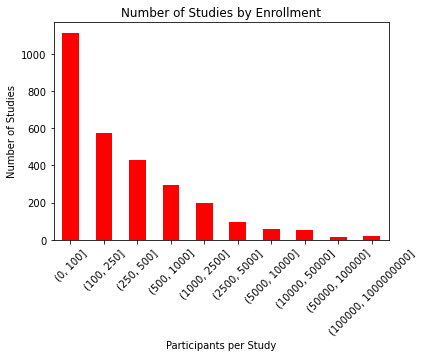

In [24]:
# create a bar graph using this dataframe
enrollment_bar = df_enrollment.plot.bar(x='binned', y='BriefTitle', rot=45, legend=False, color="r")
plt.xlabel('Participants per Study')
plt.ylabel('Number of Studies')
plt.title('Number of Studies by Enrollment')

In [25]:
# create a dataframe grouped around the STDAge (Target Age of Studies)
df_age = df_final.groupby("StdAge")[["BriefTitle"]].count()
df_age

BriefTitle
StdAge                               
Adult                             149
Adult, Older Adult               2188
Child                              29
Child, Adult                       44
Child, Adult, Older Adult         446
Older Adult                        37

In [26]:
# reset the index of the dataframe
df_age = df_age.reset_index()
df_age

StdAge  BriefTitle
0                      Adult         149
1         Adult, Older Adult        2188
2                      Child          29
3               Child, Adult          44
4  Child, Adult, Older Adult         446
5                Older Adult          37

In [27]:
# sort the values of the dataframe by the count
df_age = df_age.sort_values(by='BriefTitle', ascending=False)
df_age

StdAge  BriefTitle
1         Adult, Older Adult        2188
4  Child, Adult, Older Adult         446
0                      Adult         149
3               Child, Adult          44
5                Older Adult          37
2                      Child          29

Text(0.5, 1.0, 'Number of Studies by Target Age Group')

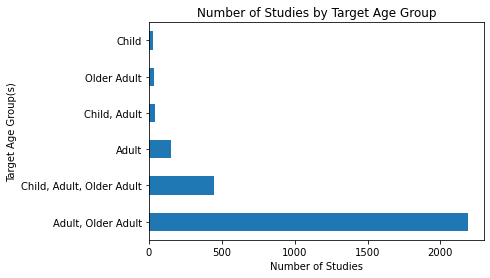

In [28]:
# create a horizontal bar graph of the results
age_bar = df_age.plot.barh(x='StdAge', y='BriefTitle', rot=0, legend=False)
plt.xlabel('Number of Studies')
plt.ylabel('Target Age Group(s)')
plt.title('Number of Studies by Target Age Group')


In [29]:
# create a dataframe that is grouped by gender
df_gender = df_final.groupby("Gender")[["BriefTitle"]].count()
df_gender

BriefTitle
Gender            
                 4
All           2796
Female          72
Male            21

In [30]:
# drop the minimal n/a results
df_gender_clean = df_gender.drop("")
df_gender_clean = df_gender_clean.reset_index()
df_gender_clean

Gender  BriefTitle
0     All        2796
1  Female          72
2    Male          21

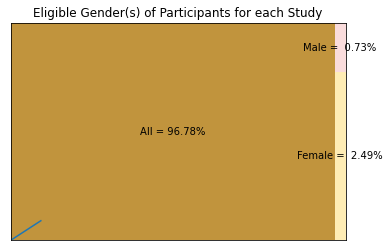

In [31]:
# create a treemap using the squarify library and the gender data
color_list = ['#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']
perc = [str('{:5.2f}'.format(i/df_gender_clean['BriefTitle'].sum()*100)) + "%" for i in df_gender_clean['BriefTitle']]
lbl = [el[0] + " = " + el[1] for el in zip(df_gender_clean['Gender'], perc)]
plt.plot(range(10))
squarify.plot(sizes=df_gender_clean['BriefTitle'], label=lbl, alpha=.8, color=color_list)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.title("Eligible Gender(s) of Participants for each Study")
plt.show()

In [32]:
# beginning of Parker's Analysis

In [33]:
#Create p_keywords (ID, Keyword)
temp_df_final = df_final
temp_df_final.reset_index(inplace=True)

In [34]:
p_Keywords = df_final[['NCTId', 'Keyword']]

In [35]:
p_keysList = []
for key in p_Keywords['Keyword']:
    key = key.replace(' ', '')
    key = key.split(',')
    p_keysList.append(key)
p_id_list = []
for i in p_Keywords['NCTId']:
    p_id_list.append(i)

In [36]:
tdf = pd.DataFrame()
tdf.insert(0, 'ID', p_id_list)
tdf.insert(1, 'Keyword', p_keysList)
p_Keywords = tdf
p_Keywords

ID                                            Keyword
0     NCT04395482   [Lunginjury, sars-covid-2, coronavirusinfection]
1     NCT04395924  [Pregnancy, RT-PCR-COVID-19, SARS-CoV2serologi...
2     NCT04476940  [COVID-19, ExclusiveBreastfeeding, Breastfeedi...
3     NCT04412265  [Coronavirus, sars-covid-2, coronavirusinfecti...
4     NCT04427332  [Coronavirus, sars-covid-2, coronavirusinfection]
...           ...                                                ...
2888  NCT04403906                      [Anitgentesting, Coronavirus]
2889  NCT04336761                   [pediatricemergencies, pandemia]
2890  NCT04344379  [COVID-19, SARS-CoV-2, hydroxychloroquine, azi...
2891  NCT04366167   [cardiacsurgery, patientreportedoutcomes, COVID]
2892  NCT04403438                                                 []

[2893 rows x 2 columns]

In [37]:
#Remove empty Keyword fields
for i, k in enumerate(p_Keywords['Keyword']):
    if len(k) == 1:
        if k[0] == '':
            p_Keywords.drop(i, axis=0, inplace=True)

p_Keywords

ID                                            Keyword
0     NCT04395482   [Lunginjury, sars-covid-2, coronavirusinfection]
1     NCT04395924  [Pregnancy, RT-PCR-COVID-19, SARS-CoV2serologi...
2     NCT04476940  [COVID-19, ExclusiveBreastfeeding, Breastfeedi...
3     NCT04412265  [Coronavirus, sars-covid-2, coronavirusinfecti...
4     NCT04427332  [Coronavirus, sars-covid-2, coronavirusinfection]
...           ...                                                ...
2887  NCT04430062   [Surgery, Covid-19, SARS-CoV-2, Surgicaloutcome]
2888  NCT04403906                      [Anitgentesting, Coronavirus]
2889  NCT04336761                   [pediatricemergencies, pandemia]
2890  NCT04344379  [COVID-19, SARS-CoV-2, hydroxychloroquine, azi...
2891  NCT04366167   [cardiacsurgery, patientreportedoutcomes, COVID]

[1697 rows x 2 columns]

In [38]:
p_all_words = pd.DataFrame()
p_wordsList = []
for k in p_Keywords['Keyword']:
    for word in k:
        new_word = word.lower()
        new_word = new_word.replace('-', ' ')
        if new_word == 'covid19':
            new_word = 'covid 19'
        elif new_word == 'coronavirusdisease2019':
            new_word = 'covid 19'
        elif new_word == 'sarscov2':
            new_word = 'sars cov 2'
        elif new_word == 'icu':
            new_word = 'intensive care unit'
        elif new_word == 'covid19pneumonia':
            p_wordsList.append('covid 19')
            new_word = 'pneumonia'
        elif new_word == 'acuterespiratorydistresssyndrome':
            new_word = 'ards'
        elif new_word == 'severeacuterespiratorysyndromecoronavirus2':
            new_word == 'sars cov 2'
            
        p_wordsList.append(new_word)
        
p_all_words.insert(0, 'Word', p_wordsList)

p_wordsCount = p_all_words.pivot_table(index=['Word'], aggfunc='size')
p_wordsCount = p_wordsCount.sort_values(ascending=False)
p_wordCountDF = pd.DataFrame(p_wordsCount)
p_wordCountDF.rename(columns={0:'Count'}, inplace=True)

In [39]:
p_wordCountDF.head(30)

Count
Word                                             
covid 19                                      976
sars cov 2                                    321
coronavirus                                   227
ards                                          103
covid                                          74
hydroxychloroquine                             73
pneumonia                                      66
sars cov2                                      65
convalescentplasma                             42
anxiety                                        33
depression                                     29
healthcareworkers                              27
mentalhealth                                   26
coronavirusinfection                           25
qualityoflife                                  25
pandemic                                       25
respiratoryfailure                             24
cytokinestorm                                  23
intensivecareunit                              22
mechanicalventilation                          20
safety                                         19
pregnancy                                      18
mortality                                      18
azithromycin                                   18
severeacuterespiratorysyndromecoronavirus2     17
criticalcare                                   16
stress                                         16
prevention                                     16
telemedicine                                   15
intensive care unit                            15

In [40]:
#Drop covid-19 and related words from DF
p_wordCountDF.drop(['covid 19', 'sars cov 2', 'coronavirus', 'covid', 'severeacuterespiratorysyndromecoronavirus2', '2019ncov', 'sars', 'novelcoronavirus', 'coronavirusinfection', 'sars cov2'], inplace=True)

In [41]:
p_wordCountDF.reset_index(inplace=True)

In [42]:
# Color palette for plots
p_colors = ['lightcoral', 'paleturquoise', 'palegoldenrod', 'plum', 'mediumaquamarine', 'sandybrown', 'mediumspringgreen', 'lightslategrey', 'palevioletred', ]

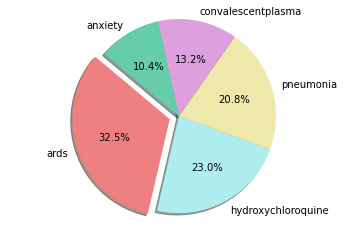

In [43]:
# Plot the top five keywords by frequency
l = 5
explode = [0]*l
explode[0] = 0.1
plt.pie(p_wordCountDF['Count'][:l], labels=p_wordCountDF['Word'][:l], colors = p_colors[:l],
         explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

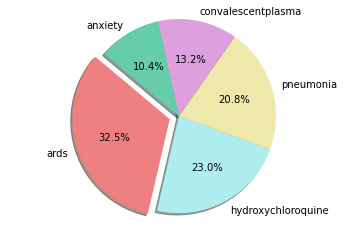

In [44]:
#Ok, now display the top 5 keywords by frequency
l = 5
explode = [0]*l
explode[0] = 0.1
plt.pie(p_wordCountDF['Count'][:l], labels=p_wordCountDF['Word'][:l], colors = p_colors[:l],
         explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

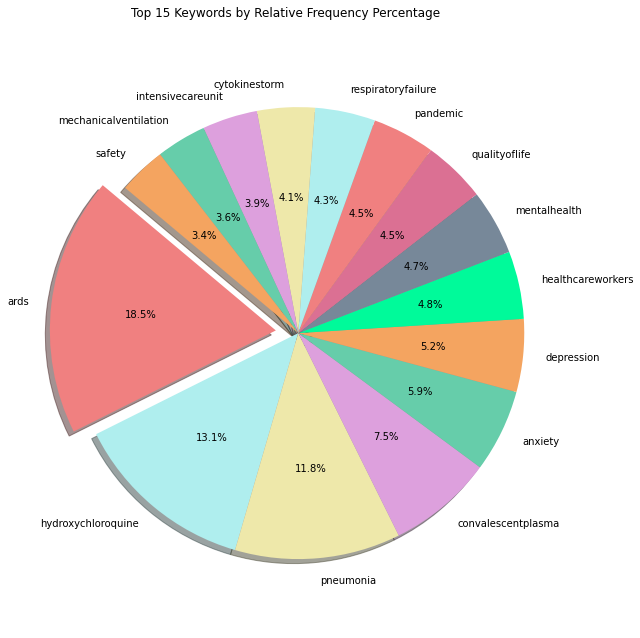

In [45]:
# Top 15
l = 15
explode = [0]*l
explode[0] = 0.1
plt.pie(p_wordCountDF['Count'][:l], labels=p_wordCountDF['Word'][:l], colors=p_colors[:l],
         explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title(f'Top {l} Keywords by Relative Frequency Percentage', pad=20)
plt.gcf().set_size_inches(9, 9)
#plt.savefig(f'Top_{l}_keywords_rel_freq.png', format='png', quality=95)
plt.tight_layout()
plt.show()

In [46]:
#Pareto Chart of top 15 keywords
l = 15
#cumulitive frequency sum
p_c_list = p_wordCountDF['Count'].cumsum()
p_c_list = p_c_list/p_wordCountDF['Count'].sum()*100
p_c_list

0         2.008972
1         3.432807
2         4.720109
3         5.539302
4         6.182953
           ...    
2838     99.921982
2839     99.941486
2840     99.960991
2841     99.980495
2842    100.000000
Name: Count, Length: 2843, dtype: float64

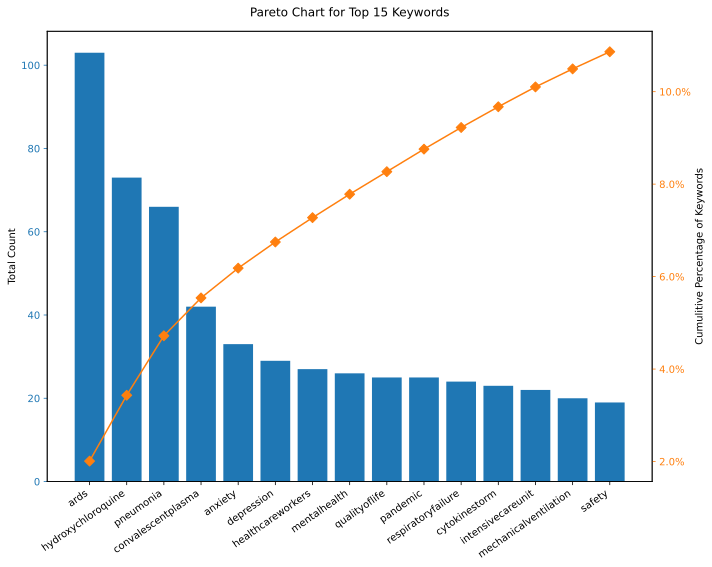

In [47]:
l = 15
fig, ax = plt.subplots()
ax.bar(p_wordCountDF['Word'][:l], p_wordCountDF['Count'][:l], color="C0")
ax2 = ax.twinx()
ax2.plot(p_wordCountDF['Word'][:l], p_c_list[:l], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(tk.PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.gcf().set_size_inches(10, 8)
%config InlineBackend.figure_format = 'svg'
ax.set_xticklabels(p_wordCountDF['Word'][:l], rotation=35, ha='right')
plt.title(f'Pareto Chart for Top {l} Keywords', pad=15)
plt.ylabel('Cumulitive Percentage of Keywords')
ax.set_ylabel('Total Count')
#plt.savefig(f'Pareto_Chart_for_Top_{l}_Keywords.png', format='png')
plt.tight_layout()
plt.show()


In [48]:
#Beginning of Ray's analysis

In [49]:
#Create a dataframe which contains site location information

NCTId = df_final["NCTId"]
fullname = df_final["OrgFullName"]
facility = df_final["LocationFacility"]
status = df_final["LocationStatus"]
city = df_final["LocationCity"]
country = df_final["LocationCountry"]
orgclass = df_final["OrgClass"]

location_data = pd.DataFrame({
    'NCTId': NCTId,
    'OrgFullName': fullname,
    'LocationFacility': facility,
    'LocationStatus': status,
    'LocationCity': city,
    'LocationCountry': country,
    'OrgClass': orgclass})

In [50]:
# Code not used in final output
#Separate OrgFull name into rows based on their NCTId
new_df_org = pd.DataFrame(location_data.OrgFullName.str.split(',').tolist(), index=location_data.NCTId).stack()

new_df_org = new_df_org.reset_index([0, 'NCTId'])
new_df_org.columns = ['NCTId', 'OrgFullName',]


pd.set_option('display.max_rows', new_df_org.shape[0]+1)

new_df_org

NCTId                                        OrgFullName
0     NCT04395482                       University of Milano Bicocca
1     NCT04395924             "Centre Hospitalier Régional dOrléans"
2     NCT04476940                            Meharry Medical College
3     NCT04412265                       University of Milano Bicocca
4     NCT04427332                       University of Milano Bicocca
5     NCT04416061                    Hong Kong Sanatorium & Hospital
6     NCT04367805                   Centre Hospitalier Universitaire
7     NCT04367805                                             Amiens
8     NCT04473170                        Abu Dhabi Stem Cells Center
9     NCT04427345                       University of Milano Bicocca
10    NCT03305341                          Medicine Invention Design
11    NCT03305341                                                Inc
12    NCT04407494                                University Hospital
13    NCT04407494                                        Montpellier
14    NCT04407585                             "Kings College London"
15    NCT04403672         Bangladesh Medical Research Council (BMRC)
16    NCT04377425                         Aarhus University Hospital
17    NCT04372004       Texas Cardiac Arrhythmia Research Foundation
18    NCT04412486           University of Mississippi Medical Center
19    NCT04490837                             Corporacion Parc Tauli
20    NCT04386109                               University of Oxford
21    NCT04424004                                    Duke University
22    NCT04384588                       Fundacion Arturo Lopez Perez
23    NCT04356560                                     Rigshospitalet
24    NCT04356560                                            Denmark
25    NCT04376398  Cliniques universitaires Saint-Luc- Université...
26    NCT04390074                                 Uppsala University
27    NCT04360811                                University Hospital
28    NCT04360811                                           Toulouse
29    NCT04353206                        Cedars-Sinai Medical Center
30    NCT04366271         Hospital Infantil Universitario Niño Jesús
31    NCT04366271                                             Madrid
32    NCT04366271                                              Spain
33    NCT04323787                                        Mayo Clinic
34    NCT04339322                                  Assiut University
35    NCT04453748                 Silesian Centre for Heart Diseases
36    NCT04437940                                Acibadem University
37    NCT04387929                         Istituto Clinico Humanitas
38    NCT04392323                                   Northwell Health
39    NCT04355897                                The Christ Hospital
40    NCT04330261                              University of Calgary
41    NCT04379310                               Nisantasi University
42    NCT04466657                         Obafemi Awolowo University
43    NCT04342637                                Al-Azhar University
44    NCT04376996                            University of Ljubljana
45    NCT04404062                      Richmond Pharmacology Limited
46    NCT04474496                             University of Arkansas
47    NCT04460274  Turkish Ministry of Health Izmir Teaching Hosp...
48    NCT04352764       Texas Cardiac Arrhythmia Research Foundation
49    NCT04349202                         William Beaumont Hospitals
50    NCT04345679                                     Orthosera Kft.
51    NCT04361422                                   Tanta University
52    NCT04416373                        Universidade Nova de Lisboa
53    NCT04332380                            Universidad del Rosario
54    NCT04337996                                 Tourcoing Hospital
55    NCT04410471    Hospital General Universitario Gregorio Marañon
56    NCT04382235                       University of Milano Bicocca
57    NCT0

Text(0.5, 1.0, 'Top 10 sites hosting clinical trials')

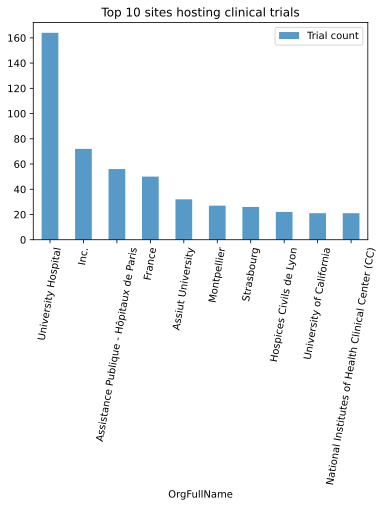

In [51]:
# Code not used in final output

# create a list of the unique organizations
unique_orgs = new_df_org["OrgFullName"].unique()
grouped_schools_df = new_df_org.groupby("OrgFullName")


# create a measure for the number of trials per org and build a dframe
trial_count_per_org = grouped_schools_df["NCTId"].count()
org_summary_df = pd.DataFrame({"Trial per org": trial_count_per_org,})

# plot the trials across treatments on a bar chart
x_axis = np.arange(len(unique_orgs))
trial_count = org_summary_df["Trial per org"]

# create data summary
df = pd.DataFrame({"Unique Orgs": unique_orgs,
                                  "Trial count": trial_count,})

# sort the data and limit to 10
dff = df.sort_values(["Trial count"], ascending=False).groupby('Unique Orgs').head(10)

try2 = dff.head(10,)

# plot the data
try2.plot(kind='bar',alpha=0.75, rot=80)

plt.title('Top 10 sites hosting clinical trials')

In [52]:


# create a list of the orgs and separte by org class
unique_orgs = location_data["OrgClass"].unique()

org_count_group = location_data.groupby("OrgClass")

# create a measure for the number of trials per org and build a dframe
trial_count_per_org = org_count_group["NCTId"].count()

# create data summary
df = pd.DataFrame({#"Unique Orgs": unique_orgs,
                    "Trial count": trial_count_per_org,})


df.head(100)

Trial count
OrgClass              
FED                  9
INDUSTRY           363
NETWORK             31
NIH                 28
OTHER             2320
OTHER_GOV          142

Text(0.5, 1.0, 'Types of organizations running clinical trials')

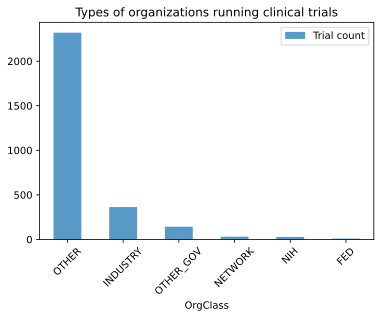

In [53]:
# create a measure for the number of studies per org and build a dframe
trial_count_per_orgc = org_count_group["NCTId"].count()
org_summary_df = pd.DataFrame({"Trial per org": trial_count_per_orgc,})

# plot the studies across classes on a bar chart
x_axis = np.arange(len(unique_orgs))
trial_count = org_summary_df["Trial per org"]

# create data summary
df = pd.DataFrame({"Unique Orgs": unique_orgs,
                                  "Trial count": trial_count,})

dff = df.sort_values(["Trial count"], ascending=False).groupby('Unique Orgs').head(10)

try2 = dff.head(10,)

try2.plot(kind='bar',alpha=0.75, rot=45)
plt.title('Types of organizations running clinical trials')

In [54]:
# Code used in final output

# separate the location status into rows based on NCTId
new_df_org = pd.DataFrame(location_data.LocationStatus.str.split(',').tolist(), index=location_data.NCTId).stack()

new_df_org = new_df_org.reset_index([0, 'NCTId'])
new_df_org.columns = ['NCTId', 'LocationStatus',]


pd.set_option('display.max_rows', new_df_org.shape[0]+1)

new_df_org

NCTId            LocationStatus
0     NCT04395482               Recruiting'
1     NCT04395482              'Recruiting'
2     NCT04395482              'Recruiting'
3     NCT04395482              'Recruiting'
4     NCT04395482              'Recruiting'
5     NCT04395482              'Recruiting'
6     NCT04395482              'Recruiting'
7     NCT04395482               'Recruiting
8     NCT04395924                Recruiting
9     NCT04476940                          
10    NCT04412265                Recruiting
11    NCT04427332                Recruiting
12    NCT04416061                          
13    NCT04367805                Recruiting
14    NCT04473170                          
15    NCT04427345                Recruiting
16    NCT03305341                          
17    NCT04407494                          
18    NCT04407585                Recruiting
19    NCT04403672                Recruiting
20    NCT04377425                          
21    NCT04372004                          
22    NCT04412486                Recruiting
23    NCT04490837                          
24    NCT04386109                Recruiting
25    NCT04424004                          
26    NCT04384588                Recruiting
27    NCT04356560                          
28    NCT04376398                Recruiting
29    NCT04390074                          
30    NCT04360811                Recruiting
31    NCT04353206               Recruiting'
32    NCT04353206       'Not yet recruiting
33    NCT04366271       Not yet recruiting'
34    NCT04366271      'Not yet recruiting'
35    NCT04366271      'Not yet recruiting'
36    NCT04366271      'Not yet recruiting'
37    NCT04366271              'Recruiting'
38    NCT04366271       'Not yet recruiting
39    NCT04323787               Recruiting'
40    NCT04323787              'Recruiting'
41    NCT04323787      'Not yet recruiting'
42    NCT04323787               'Recruiting
43    NCT04339322                          
44    NCT04453748                          
45    NCT04437940                Recruiting
46    NCT04387929                Recruiting
47    NCT04392323               Recruiting'
48    NCT04392323               'Recruiting
49    NCT04355897               Recruiting'
50    NCT04355897               'Recruiting
51    NCT04330261                Recruiting
52    NCT04379310                          
53    NCT04466657                          
54    NCT04342637                          
55    NCT04376996                Recruiting
56    NCT04404062                          
57    NCT04474496                          
58    NCT04460274                          
59    NCT04352764                Recruiting
60    NCT04349202               Recruiting'
61    NCT04349202       'Not yet recruiting
62    NCT04345679                          
63    NCT04361422                          
64    NCT04416373                Recruiting
65    NCT04332380                          
66    NCT04337996                          
67    NCT04410471       Not yet recruiting'
68    NCT04410471               'Recruiting
69    NCT04382235                          
70    NCT04420468                          
71    NCT04377685                Recruiting
72    NCT04410549               Recruiting'
73    NCT04410549               'Recruiting
74    NCT04413045                Recruiting
75    NCT04473248               Recruiting'
76    NCT04473248               'Recruiting
77    NCT04364828                          
78    NCT04441502                Recruiting
79    NCT04460690                          
80    NCT04424849                Recruiting
81    NCT04463472                Recruiting
82    NCT04431310               Recruiting'
83    NCT04431310               'Recruiting
84    NCT04384887                          
85    NCT04343781                          
86    NCT04416256                Recruiting
87    NCT04355715                          
88    NCT04370288                Recruiting
89    NCT04391738                          
90    NC

In [55]:
# find out what unique statuses exist
unique_orgs = new_df_org["LocationStatus"].unique()

print(unique_orgs)

["Recruiting'" " 'Recruiting'" " 'Recruiting" 'Recruiting' ''
 " 'Not yet recruiting" "Not yet recruiting'" " 'Not yet recruiting'"
 "Available'" " 'Available'" " 'Available" " 'Suspended'" " 'Active"
 " not recruiting'" 'Available' 'Active' ' not recruiting'
 "Enrolling by invitation'" "Completed'" " 'Withdrawn'" " 'Completed'"
 " 'Completed" " 'Withdrawn" " 'Terminated'"]


In [56]:
# standardize the data for location status

new_df_org["LocationStatus"].replace({"Recruiting'": "Recruiting", " 'Recruiting'": "Recruiting", " 'Recruiting": "Recruiting"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Not yet recruiting": "Not yet recruiting", "Not yet recruiting'": "Not yet recruiting"}, inplace=True)
new_df_org["LocationStatus"].replace({"Available'": "Available", " 'Available'": "Available", " 'Available": "Available"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Suspended'": "Suspended"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Suspended'": "Suspended"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Active": "Active"}, inplace=True)
new_df_org["LocationStatus"].replace({" not recruiting'": "Not recruiting"," not recruiting": "Not recruiting", " 'Not yet recruiting'": "Not recruiting"}, inplace=True)
new_df_org["LocationStatus"].replace({"Completed'": "Completed"," 'Completed'": "Completed"," 'Completed": "Completed" }, inplace=True)
new_df_org["LocationStatus"].replace({" 'Active": "Active"}, inplace=True)
new_df_org["LocationStatus"].replace({"Enrolling by invitation'": "Enrolling by invitation"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Withdrawn'": "Withdrawn"," 'Withdrawn": "Withdrawn", }, inplace=True)
new_df_org["LocationStatus"].replace({" 'Terminated'": "Terminated"}, inplace=True)
new_df_org["LocationStatus"].replace({"": "No status"}, inplace=True)

In [57]:
#print list to ensure data is standardized
unique_status = new_df_org["LocationStatus"].unique()

for i in unique_status:
    print(i)

Recruiting
No status
Not yet recruiting
Not recruiting
Available
Suspended
Active
Enrolling by invitation
Completed
Withdrawn
Terminated


In [58]:
# group the studies by their status
org_status_group = new_df_org.groupby("LocationStatus")

# create a measure for the number of trials per status and build a dframe
trial_status_per_org = org_status_group["NCTId"].count()

# create data summary
df = pd.DataFrame({#"Unique Orgs": unique_orgs,
                    "Trial count": trial_status_per_org,})


df.head(100)

Trial count
LocationStatus                      
Active                            69
Available                        304
Completed                         65
Enrolling by invitation            1
No status                       1404
Not recruiting                  1047
Not yet recruiting               165
Recruiting                      5958
Suspended                          5
Terminated                         1
Withdrawn                         10

Text(0.5, 1.0, 'Status of clinical trial sites for COVID-19')

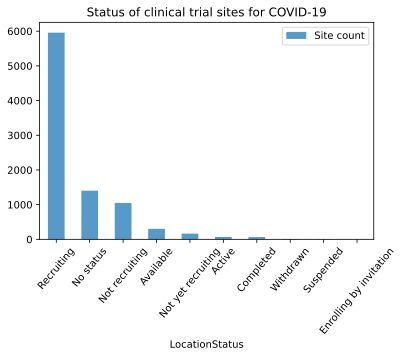

In [59]:
# create a measure for the number of trials per status and build a dframe
trial_count_per_status = org_status_group["NCTId"].count()
status_summary_df = pd.DataFrame({"Trial per status": trial_count_per_status,})

# plot the trials across status on a bar chart
x_axis = np.arange(len(unique_orgs))
site_count = status_summary_df["Trial per status"]


# create data summary
df = pd.DataFrame({"Unique Orgs": unique_status,
                                  "Site count": site_count,})

dff = df.sort_values(["Site count"], ascending=False).groupby('Unique Orgs').head(10)

try2 = dff.head(10,)

try2.plot(kind='bar',alpha=0.75, rot=50)

plt.title('Status of clinical trial sites for COVID-19')

In [60]:
# find the total number of locations
Total_Locations = df["Site count"].sum()

Total_Locations

9029

In [61]:
# Add blanks to avoid double counts
new_df_org["LocationStatus"].replace({"No Status": ""}, inplace=True)

# group the sites by their trial names and find the locations per trial
grouped_sites = new_df_org.groupby(['NCTId'])
Sites_per_study = grouped_sites["LocationStatus"].count()

# build a dataframe with Sites per studies and convert sites to number
grade_summary_df = pd.DataFrame({"Sites per Study": Sites_per_study})
grade_summary_df["Sites per Study"] = grade_summary_df.loc[:, "Sites per Study"].astype(float)


pd.set_option('display.max_rows', grade_summary_df.shape[0]+1)

print(grade_summary_df)

             Sites per Study
NCTId                       
NCT01306084              1.0
NCT02517489             32.0
NCT02656381              1.0
NCT02735707             90.0
NCT02765191              1.0
NCT02788903              1.0
NCT02875301              5.0
NCT02901041              1.0
NCT03042143              1.0
NCT03105102            505.0
NCT03175796              1.0
NCT03184662             20.0
NCT03260140              1.0
NCT03261050              3.0
NCT03276559              4.0
NCT03305341              1.0
NCT03323463              8.0
NCT03331445              1.0
NCT03348670              1.0
NCT03376854              1.0
NCT03398135            379.0
NCT03452774              1.0
NCT03620409              1.0
NCT03648372              8.0
NCT03651622              1.0
NCT03680274              1.0
NCT03681288              1.0
NCT03684980              8.0
NCT03710746              2.0
NCT03716869              1.0
NCT03724045              1.0
NCT03728257              1.0
NCT03793673   

In [62]:
# Create the bins in which Data will be held
bins = [0, 1, 2, 3, 5, 10, 25, 50, 100, 1000]

# Create the names for the bins
group_names = ["1", "2", "3", "4 or 5", "6 to 10", "11 to 25", "26 to 50", "51 to 100", "101 or more"]

# add a column of the bins to the table
pd.cut(grade_summary_df["Sites per Study"], bins, labels=group_names).head()
grade_summary_df["Site Range"] = pd.cut(grade_summary_df["Sites per Study"], bins, labels=group_names)

# Create a GroupBy object based upon range
budget_group = grade_summary_df.groupby("Site Range")

# Find how many rows fall into each bin
print(budget_group["Site Range"].count())

Site Range
1              2422
2               121
3                63
4 or 5           80
6 to 10          94
11 to 25         64
26 to 50         27
51 to 100        18
101 or more       4
Name: Site Range, dtype: int64


Text(0, 0.5, 'Number of Trials')

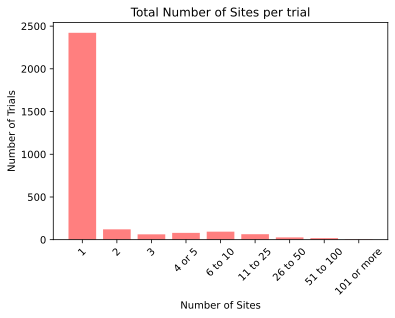

In [63]:
# create list of site numbers
sites = ["1", "2", "3", "4 or 5", "6 to 10", "11 to 25", "26 to 50", "51 to 100", "101 or more"]

# create a count of the sites per study
site_count = budget_group["Sites per Study"].count()
x_axis = np.arange(len(sites))


# plot the site ranges as x and trial count as y
plt.bar(x_axis, site_count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation=45)
plt.xticks(tick_locations, sites)

# add title and axis labels
plt.title("Total Number of Sites per trial")
plt.xlabel("Number of Sites")
plt.ylabel("Number of Trials")

In [64]:
# Varun's section of analysis

In [65]:
# break down complete dataframe into the sections I need
df_timegeo = df_final[["NCTId","BriefTitle","StartDate","CompletionDate","LocationStatus","LocationCity","LocationCountry"]]
df_timegeo

NCTId                                         BriefTitle  \
0     NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
1     NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   
2     NCT04476940  COVID-19 Breastfeeding Guideline for African-A...   
3     NCT04412265          Frailty in Elderly Patients With COVID-19   
4     NCT04427332     Smell and Taste Disorders in COVID-19 Patients   
5     NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
6     NCT04367805  COVID-19 Infection in Patients With Hepatocell...   
7     NCT04473170  Study Evaluating the Safety and Efficacy of Au...   
8     NCT04427345               Predictive Factors COVID-19 Patients   
9     NCT03305341  Discovery Stage (Proof-of-concept) COVID-19 An...   
10    NCT04407494  Diagnostic Value of Patient - Reported and Cli...   
11    NCT04407585  Testing the Accuracy of a Digital Test to Diag...   
12    NCT04403672  Performance Evaluation of RealDetect™ COVID-19...   
13    NCT04377425  COVID-19 Prevalence and Cognitive Deficits in ...   
14    NCT04372004  Comparison of the Efficacy of Rapid Tests to I...   
15    NCT04412486     COVID-19 Convalescent Plasma (CCP) Transfusion   
16    NCT04490837  Rapid Diagnostic Test for COVID-19 Based on An...   
17    NCT04386109  Neonatal Complications of Coronavirus Disease ...   
18    NCT04424004  MURDOCK Cabarrus County COVID-19 Prevalence an...   
19    NCT04384588  COVID19-Convalescent Plasma for Treating Patie...   
20    NCT04356560  COVID-19 Surveillance of Patients and Healthca...   
21    NCT04376398  Survey: COVID-19 Patients Managed in the Opera...   
22    NCT04390074  COVID-19 in the Swedish ICU-cohort: Risk Facto...   
23    NCT04360811  Assessment of Obstetric, Fetal and Neonatal Ri...   
24    NCT04353206  Convalescent Plasma in ICU Patients With COVID...   
25    NCT04366271  Clinical Trial of Allogeneic Mesenchymal Cells...   
26    NCT04323787  Viral Infection and Respiratory Illness Univer...   
27    NCT04339322  Characteristics and Outcome of Coronavirus Dis...   
28    NCT04453748  The Assessment of the Prevalence, Clinical Cou...   
29    NCT04437940  Evaluation of Vaginal Fluid for Covid-19 Posit...   
30    NCT04387929  Detection of Anti-COVID-19 Antibody Levels in ...   
31    NCT04392323  Incidence of COVID-19 Test Conversion in Post-...   
32    NCT04355897  CoVID-19 Plasma in Treatment of COVID-19 Patients   
33    NCT04330261  Clinical Characteristics and Outcomes of Pedia...   
34    NCT04379310  Evaluation of Clinical Parameters on Admission...   
35    NCT04466657             Antioxidant Therapy for COVID-19 Study   
36    NCT04342637                          COVID-19 Endoscopy Survey   
37    NCT04376996       Slovenian National COVID-19 Prevalence Study   
38    NCT04404062                       Validation of COVID-19 Tests   
39    NCT04474496  Impact of COVID-19 on Marshallese Communities ...   
40    NCT04460274        Forecast Number of Covid-19 Cases Worldwide   
41    NCT04352764  ANTIBODY BASED TESTS FOR SARSCoV-2 COVID-19) -...   
42    NCT04349202  Beaumont Health Large-scale Automated Serologi...   
43    NCT04345679          Anti COVID-19 Convalescent Plasma Therapy   
44    NCT04361422              Isotretinoin in Treatment of COVID-19   
45    NCT04416373                    COVID-19 and Pregnancy Outcomes   
46    NCT04332380  Convalescent Plasma for Patients With COVID-19...   
47    NCT04337996    Dynamic Evaluation of COVID-19 Diagnostic Tests   
48    NCT04410471  Humoral Immunity Against SARS-CoV-2 in Liver T...   
49    NCT04382235  Non-invasive Ventilatory Support of Patients A...   
50    NCT04420468  Descriptive and Retrospective Analysis of Acut...   
51    NCT04377685  Prediction of Clinical Course in COVID19 Patients   
52    NCT04410549  Pulmonary Optical Coherence Tomography in COVI...   
53    NCT04413045                Novel COVID-19, A National Analysis   
54    NCT04473248  Spartan COVID-19 System: Evaluati

Text(0.5, 1.0, 'Countries with largest #trials')

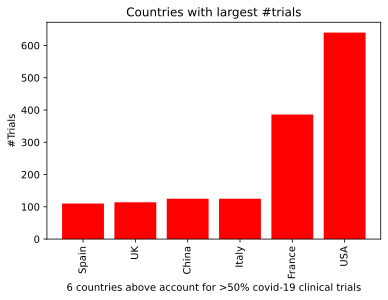

In [66]:
#Cleanup DataFrame countries to just be one word
new_df = pd.DataFrame(df_timegeo.LocationCountry.str.split(',').tolist(),index=df_timegeo.NCTId).stack()

#Make list of unique countries to calculate #unique countries with trials
unique_countries = []
for i in new_df:
    if i not in unique_countries:
        unique_countries.append(i)

#Tabulate #trials in the G8 countries to begin evaluating wealth/trials relationship:
USA = new_df[new_df == 'United States']
UK = new_df[new_df == 'United Kingdom']
China = new_df[new_df == 'China']
Italy = new_df[new_df == 'Italy']
France = new_df[new_df == 'France']
Spain = new_df[new_df == 'Spain']

contr = len(USA) + len(UK) + len(China) + len(Italy) + len(France) + len(Spain)

#Create DataFrame of the key countries with #trials
chart_data = pd.DataFrame({"Top Countries": ["USA","UK","France","China","Italy","Spain"],"#Trials": [len(USA),
                          len(UK),len(France),len(China),len(Italy),len(Spain)]})
chart_data = chart_data.sort_values("#Trials")

#Plot chart with countries
plt.bar(chart_data["Top Countries"], chart_data["#Trials"], color='red')
plt.xticks(rotation=90)
plt.xlabel("6 countries above account for >50% covid-19 clinical trials")
plt.ylabel("#Trials")
plt.title("Countries with largest #trials")

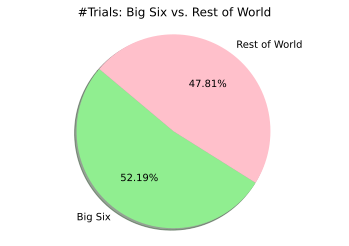

In [67]:
#Pie Chart for trials between the Big Six and Rest of the World
ntrials = 2874
#From datapull from API, 2874 total trials conducted
RoW = 2874 - contr
labels = ["Big Six", "Rest of World"]
trials = [contr, RoW ]
colors = ["lightgreen","pink"]
plt.pie(trials, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("#Trials: Big Six vs. Rest of World")
plt.show()

/opt/anaconda3/envs/PythonData3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


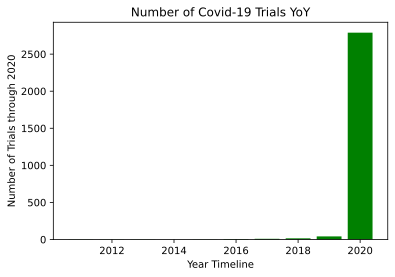

In [68]:
#Isolating year of study for dataframes
df_timegeo1 = df_timegeo[["NCTId","BriefTitle","StartDate","LocationCountry"]]
df_timegeo1['year']=pd.DatetimeIndex(df_timegeo1['StartDate']).year

#How many unique years are there? (11)
df_timegeo1.year.nunique(dropna=True)

#Isolate and display the actual unique years
timegeo = df_timegeo1['year'].unique()
timegeo = [x for x in timegeo if str(x)!='nan']
timegeo.remove(1998.0)
timegeo.remove(2021.0)
timegeo.sort()

#How many times does each unique year appear in timegeo?
year_unique = df_timegeo1.groupby(['year']).count()
year_unique = year_unique[["StartDate"]]

#Create list from year counts
year_lst = year_unique["StartDate"].tolist()
year_lst.remove(1)
year_lst.remove(4)

#Create chart from years and year counts
plt.bar(timegeo, year_lst, color="green", label="timegeo")
plt.xlabel('Year Timeline')
plt.ylabel('Number of Trials through 2020')
plt.title('Number of Covid-19 Trials YoY')
plt.show()
